## Sports Analytics Notebook
#### by Trevor Alback started 1/4/2022

In [37]:
# This NBA api is somewhat free, if you sigh up, you can get free calls, but not to all data.
# Try another way

import http.client

conn = http.client.HTTPSConnection("api-nba-v1.p.rapidapi.com")

headers = {
    'X-RapidAPI-Host': "api-nba-v1.p.rapidapi.com",
    'X-RapidAPI-Key': "a77dba0749mshc84499458a980c3p12cfbcjsn2aee80739e7e"
    }

conn.request("GET", "/seasons", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"message":"You are not subscribed to this API."}


In [38]:
## There is an nba_api package which is an api client to get data from nba.com
## https://pypi.org/project/nba-api/

In [39]:
# pip install the package to access the libraries
# pip install nba_api

In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

In [41]:
# Example data extract below: find league leaders
# Access leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Create a league leaders data frame (ll_df) using "data" variable and its built in functions
ll_df = data.league_leaders.get_data_frame()

In [42]:
ll_df.head()

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201942,1,DeMar DeRozan,CHI,75,2713,767,1522,0.504,50,...,391,373,68,24,176,176,2101,1954,2.12,0.39
1,1629027,2,Trae Young,ATL,74,2582,689,1501,0.459,226,...,277,718,71,7,291,123,2092,2009,2.47,0.24
2,203954,3,Joel Embiid,PHI,67,2259,652,1317,0.495,91,...,776,280,75,98,209,177,2038,2248,1.34,0.36
3,1628369,4,Jayson Tatum,BOS,75,2705,697,1550,0.450,224,...,600,331,74,49,212,172,2015,1935,1.56,0.35
4,203999,5,Nikola Jokic,DEN,74,2476,764,1311,0.583,97,...,1019,584,109,63,281,191,2004,2862,2.08,0.39


In [43]:
print(ll_df.shape)
ll_df.columns

(602, 27)


Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [44]:
#ll_df.info()

In [45]:
## See endpoints
#help(endpoints)

What are we looking for? Let's import player info from static and test some example unique ID's
See bottom of below link for reference on accessing player and team id's
https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb

In [46]:
from nba_api.stats.static import players
nba_players = players.get_players()
nba_players[:3]

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False}]

In [47]:
# Find a unique player id for a player by full name
# Names are case sensitive
# utilise both .format and f string
KD = [player for player in nba_players if player['full_name'] == 'Kevin Durant'][0]
print('Kevin info: {}'.format(KD))
print('--------')
KD_ID = KD['id']
f'Kevin unique ID: {KD_ID}'

Kevin info: {'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}
--------


'Kevin unique ID: 201142'

In [48]:
print('Number of players fetched: {}'.format(len(nba_players)))

Number of players fetched: 4723


In [49]:
# Example accessing dictionary items matching a condition
d = {"foo": 1, "bar": 2, "baz": 1}
keys_for_1 = [k for k in d if d[k] == 1]
print(keys_for_1)

['foo', 'baz']


I wanted to see how many players in this list had the last name 'Jordan'. I wondered how many more Jordans there were on top of Michael Jordan and DeAndre Jordan.  

I loop through the list of dictionaries for a last name matching 'Jordan'.

In [50]:
how_many_Jordans = 0
Jordans_info = []
for i in range(len(nba_players)):
    if nba_players[i]['last_name'] == 'Jordan':
        Jordans_info.append(nba_players[i])
        how_many_Jordans += 1
print('There are {} Jordans in this NBA player list'.format(how_many_Jordans))

There are 8 Jordans in this NBA player list


In [51]:
# who are they
for Jordan in range(len(Jordans_info)):
    print(Jordans_info[Jordan]['full_name'])

Adonis Jordan
DeAndre Jordan
Eddie Jordan
Jerome Jordan
Michael Jordan
Reggie Jordan
Thomas Jordan
Walter Jordan


What about players with the first name 'James'? I knew of James Harden, James Worthy, James Johnson.

In [52]:
how_many_Jameses = 0
James_info = []
for i in range(len(nba_players)):
    if nba_players[i]['first_name'] == 'James':
        James_info.append(nba_players[i])
        how_many_Jameses += 1
print('There are {} players with the first name of James'.format(how_many_Jameses))

There are 31 players with the first name of James


In [53]:
for James in range(len(James_info)):
    print(James_info[James]['full_name'])

James Anderson
James Augustine
James Bailey
James Blackwell
James Bouknight
James Collins
James Cotton
James Davis
James Donaldson
James Edwards
James Ennis III
James Harden
James Hardy
James Johnson
James Jones
James Lang
James Nunnally
James Owens
James Posey
James Robinson
James Scott
James Silas
James Singleton
James Southerland
James Thomas
James Webb III
James White
James Wilkes
James Wiseman
James Worthy
James Young


In [54]:
# team Ids
from nba_api.stats.static import teams 
NBA_teams = teams.get_teams()
print('There are {} teams in this list of dictionaries of NBA teams.'.format(len(NBA_teams)))

There are 30 teams in this list of dictionaries of NBA teams.


In [55]:
# Golden State Warriors team id
GSW = [x for x in NBA_teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_ID = GSW['id']
GSW_ID

1610612744

In [56]:
GSW

{'id': 1610612744,
 'full_name': 'Golden State Warriors',
 'abbreviation': 'GSW',
 'nickname': 'Warriors',
 'city': 'Golden State',
 'state': 'California',
 'year_founded': 1946}

We want player id and team id so we can extract other data. 
Let's have a look at Kevin Durant (my favourite player!) and the fan favourite GSW.
From earlier:

In [57]:
print(KD_ID)
print(GSW_ID)

201142
1610612744


In [58]:
from nba_api.stats.endpoints import playercareerstats

In [59]:
# Kevin Durant
KD_career = playercareerstats.PlayerCareerStats(player_id=str(KD_ID))
KD_yby = KD_career.get_data_frames()[0]
KD_yby.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201142,2007-08,00,1610612760,SEA,19.0,80,80,2768.0,587,...,0.873,70,278,348,192,78,75,232,122,1624
1,201142,2008-09,00,1610612760,OKC,20.0,74,74,2885.0,661,...,0.863,77,405,482,205,96,53,225,134,1871
2,201142,2009-10,00,1610612760,OKC,21.0,82,82,3239.0,794,...,0.900,105,518,623,231,112,84,271,171,2472
3,201142,2010-11,00,1610612760,OKC,22.0,78,78,3038.0,711,...,0.880,57,476,533,214,88,76,218,159,2161
4,201142,2011-12,00,1610612760,OKC,23.0,66,66,2546.0,643,...,0.860,40,487,527,231,88,77,248,133,1850


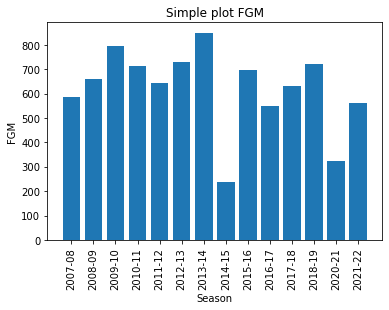

In [60]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FGM')
plt.xticks(rotation=90)
ax.grid(False)

A quick look at the chart shows 2013-2014 as the highest FGM made, followed by 2014-2015 as the lowest. 
A quick google shows that Durant won the MVP (most valuable player) in 2013-2014 season and was then injured in the 2014-2015 season (only playing 27 games, hence leading to lower FGM). 
<br><br>Perhaps this is better shown including games played. Although I'm not a huge fan of plots sharing axes, this shows the correltaion between FGM and Games Played.

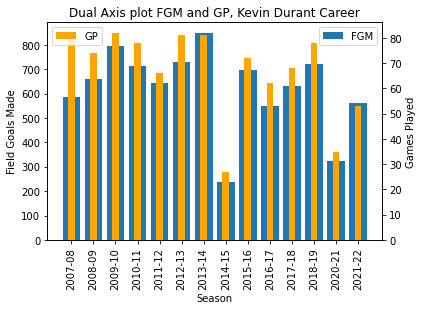

In [101]:
fig, ax = plt.subplots()


width = 0.3

ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'], label='FGM')
ax.set(xlabel='Season', ylabel='Field Goals Made',
       title='Dual Axis plot FGM and GP, Kevin Durant Career')
plt.xticks(rotation=90)
ax.grid(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(KD_yby['SEASON_ID'], KD_yby['GP'],color='orange', label = 'GP', width = width)
ax2.set_ylabel("Games Played")

ax.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')

plt.show()

A few things make sense. In his first season, he played a lot of games but took less shots, expected of a rookie/younger player new into the NBA. Even so, he won rookie of the year (best new player into the NBA). His shots generally increased in the early years, while the number of games remained relatively similar until MVP in 2013-2014 (a dip in 11/12 with slightly less GP/FGM). Season 14/15 and 20/21 show less GP and therefore less FGM due to injury. Overall, he has played less games in his later years compared to his early years in the NBA. Knowing that he also missed games in 2021-2022 due to injury again. It will be interesting to monitor this in the coming years. 

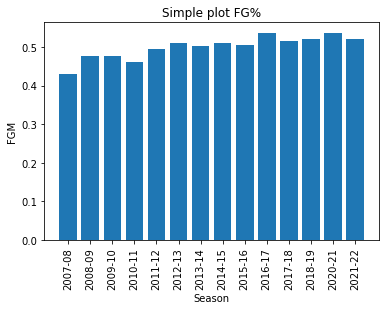

In [105]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)

Impressivley, KD's FG% shows an increasing trend season on season. Perhaps this is better seen in a line chart. 

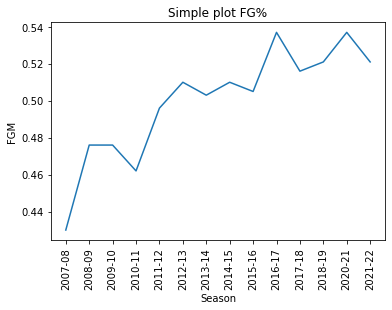

In [106]:
fig, ax = plt.subplots()
ax.plot(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)